### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-09/02/20
#### Clasificacion de imagenes motoras en EEG con LSTM o GRU
##### Caracteristicas = RAW
##### 5 ejecuciones independientes

#### LSTM
##### Sujeto 1
##### Accuracy = 25.35%
##### Kappa = 0.0046

#### GRU
##### Sujeto 1
##### Accuracy = 23%
##### Kappa = 0

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 1000))
x_test = x_test.reshape((n_samples_test, 22, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000)
(288, 22, 1000)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


In [0]:
def RNN_LSTM():
  model = Sequential()
  model.add(LSTM(16, return_sequences=True, input_shape=x_train.shape[1:]))
  model.add(LSTM(16))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))
    
  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def RNN_GRU():
  model = Sequential()
  model.add(GRU(16, return_sequences=True, input_shape=x_train.shape[1:]))
  model.add(GRU(16))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 288 samples, validate on 288 samples
Epoch 1/40
288/288 - 48s - loss: 1.3925 - acc: 0.2500 - val_loss: 1.3985 - val_acc: 0.2361
Epoch 2/40
288/288 - 47s - loss: 1.3962 - acc: 0.2292 - val_loss: 1.3986 - val_acc: 0.2326
Epoch 3/40
288/288 - 47s - loss: 1.3918 - acc: 0.2535 - val_loss: 1.3986 - val_acc: 0.2257
Epoch 4/40
288/288 - 47s - loss: 1.3909 - acc: 0.2500 - val_loss: 1.3984 - val_acc: 0.2292
Epoch 5/40
288/288 - 48s - loss: 1.3877 - acc: 0.2674 - val_loss: 1.3985 - val_acc: 0.2326
Epoch 6/40
288/288 - 47s - loss: 1.3784 - acc: 0.2778 - val_loss: 1.3984 - val_acc: 0.2188
Epoch 7/40
288/288 - 47s - loss: 1.3919 - acc: 0.2535 - val_loss: 1.3986 - val_acc: 0.2153
Epoch 8/40
288/288 - 46s - loss: 1.3842 - acc: 0.2847 - val_loss: 1.3985 - val_acc: 0.2222
Epoch 9/40
288/288 - 47s - loss: 1.387

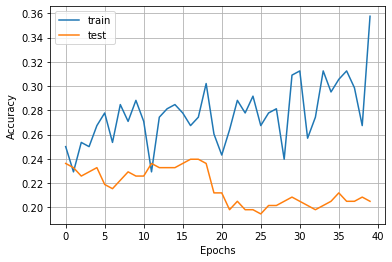

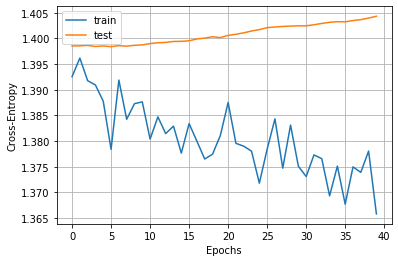


Resultados:
loss: [1.4043242931365967]
accuracy: [0.2048611]
kappa: [-0.06018518518518512]
f1: [0.19503956547067786]


In [15]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(3):
    print("Iteration:", i+1);
    
    model = RNN_GRU()

    history = model.fit(x_train, y_train, epochs=40, batch_size=18,
                        validation_data=(x_test, y_test), verbose=2)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1000, 16)          1872      
_________________________________________________________________
gru_1 (GRU)                  (None, 16)                1584      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
Total params: 3,524
Trainable params: 3,524
Non-trainable params: 0
_________________________________________________________________


In [17]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.2049
Mean Kappa: -0.0602
Mean F1: 0.1950
Max Accuracy: 0.2049
Max Kappa: -0.0602
Max F1: 0.1950
